In [1]:
import pandas as pd
import numpy as py
import plotly.express as px  
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#Coletando dados

df_iris = pd.read_csv (r"C:\Users\Thomaz David\Desktop\Python\Boot_camp_xp\Iris.csv", sep = ',')

In [3]:
#Gerando algumas estatisticas da base de dados
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Numero de classes existentes no dataframe
df_iris['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
#Numero de colunas e linhas

df_iris.shape

(150, 6)

In [6]:
#Verificando se existem valores nulos

df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#Coletando dados das petalas

X_petalas = df_iris.iloc[:,[3,4]].values

X_petalas[:10]



array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

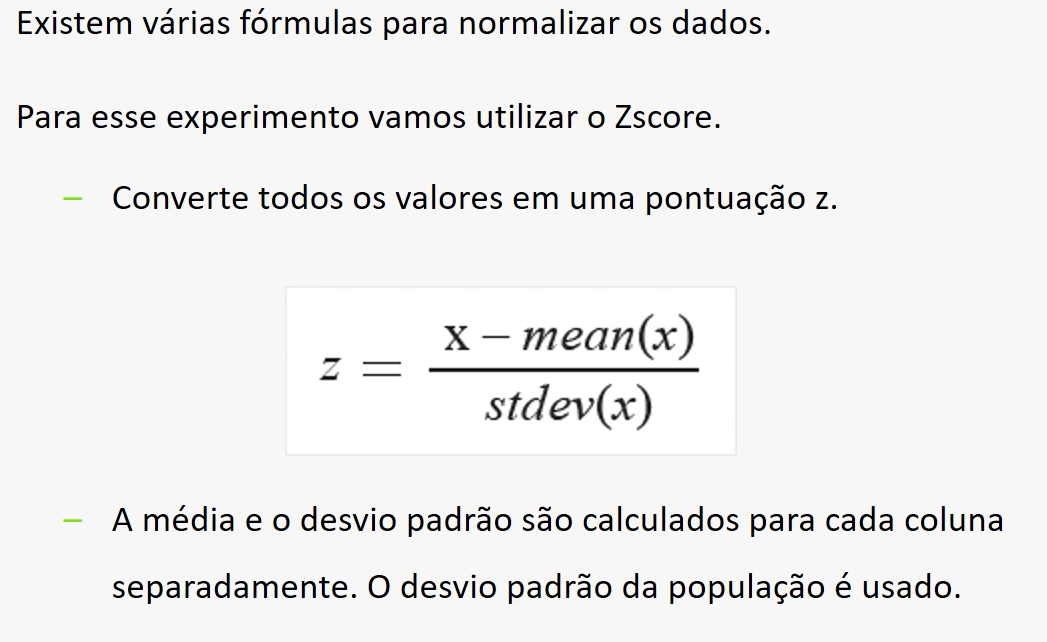

In [8]:
#Normalizndo os dados

normalizar_dados = StandardScaler()
X_petalas = normalizar_dados.fit_transform(X_petalas)
X_petalas[:15]

array([[-1.3412724 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.39813811, -1.31297673],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.17067529, -1.05003079],
       [-1.3412724 , -1.18150376],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.2844067 , -1.4444497 ],
       [-1.2844067 , -1.31297673],
       [-1.227541  , -1.31297673],
       [-1.3412724 , -1.4444497 ],
       [-1.51186952, -1.4444497 ],
       [-1.45500381, -1.31297673]])

In [9]:
#Calculando o numero de clusters

wcss_petalas = []
for i in range(1, 11):
    kmeans_petalas = KMeans(n_clusters = i, random_state=0)
    kmeans_petalas.fit(X_petalas)
    wcss_petalas.append(kmeans_petalas.inertia_)

c:\Users\Thomaz David\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Thomaz David\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Thomaz David\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Thomaz David\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args,

In [10]:
#Visualiando  os valores do wcss

for i in range(len(wcss_petalas)):
    print("Cluster:", i, " - Valor do WCSS:", wcss_petalas[i])

Cluster: 0  - Valor do WCSS: 299.99999999999994
Cluster: 1  - Valor do WCSS: 54.14584701344989
Cluster: 2  - Valor do WCSS: 18.046983891906272
Cluster: 3  - Valor do WCSS: 12.307440251261843
Cluster: 4  - Valor do WCSS: 9.192414757507372
Cluster: 5  - Valor do WCSS: 7.22788755396305
Cluster: 6  - Valor do WCSS: 6.699766804805107
Cluster: 7  - Valor do WCSS: 6.20034540530592
Cluster: 8  - Valor do WCSS: 4.9366577773751095
Cluster: 9  - Valor do WCSS: 4.533503232466193


In [11]:
#Definindo o numero de clusters

grafico_cotovelo_petalas = px.line(x=range(1, 11),y=wcss_petalas)
grafico_cotovelo_petalas.update_xaxes(title_text='Número de Clusters')
grafico_cotovelo_petalas.update_yaxes(title_text='WCSS')
grafico_cotovelo_petalas.update_layout(title_text='Método do Cotovelo para as Pétalas', title_x=0.5, title_y=0.95)
grafico_cotovelo_petalas.show()

In [12]:
#Executando o Kmeans

kmeans_petalas = KMeans(n_clusters = 3, random_state=0)
labels_cluster_petalas = kmeans_petalas.fit_predict(X_petalas)

In [13]:
#Verifica a classificação dos clusters
labels_cluster_petalas  

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
#Visualizando os centroides

centroides_petalas = kmeans_petalas.cluster_centers_
centroides_petalas

array([[ 0.30564587,  0.16609419],
       [-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028]])

In [15]:
#Visualizando dados agrupados

grafico_petalas = px.scatter(x = X_petalas[:,0],y=X_petalas[:,1],color=labels_cluster_petalas)
grafico_centroide_petalas = px.scatter(x = centroides_petalas [:,0],y=centroides_petalas [:,1],size=[8,8,8])
grafico_final = go.Figure(data=grafico_petalas.data + grafico_centroide_petalas.data)
grafico_final.show()

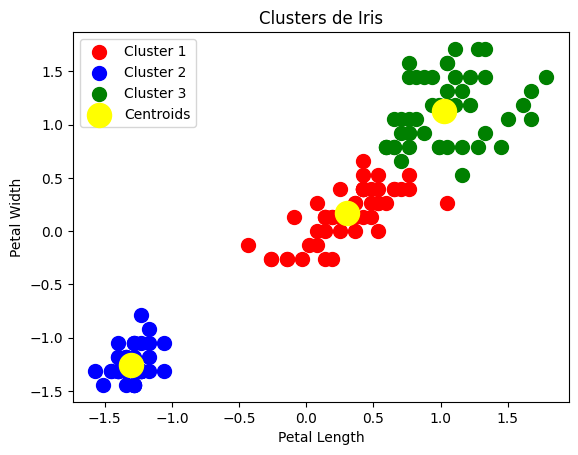

In [17]:
#plotar grafico final
plt.scatter(X_petalas[labels_cluster_petalas == 0, 0], X_petalas[labels_cluster_petalas == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_petalas[labels_cluster_petalas == 1, 0], X_petalas[labels_cluster_petalas == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_petalas[labels_cluster_petalas == 2, 0], X_petalas[labels_cluster_petalas == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_petalas.cluster_centers_[:, 0], kmeans_petalas.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de Iris')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()